In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from selenium import webdriver
from bs4 import BeautifulSoup

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import logging

In [151]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd

In [212]:
print('Requests version: {}'.format(requests.__version__))
print('BeautifulSoup version: {}'.format(bs4.__version__))
print('Pandas version: {}'.format(pd.__version__))

Requests version: 2.28.1
BeautifulSoup version: 4.11.1
Pandas version: 1.4.4


In [231]:
urls = {
    'north': 'http://citypopulation.de/en/newzealand/northisland',
    'south': 'http://citypopulation.de/en/newzealand/southisland/'
}

In [232]:
output = requests.get(urls['north'])
print(output)

<Response [200]>


In [233]:
output.text[:200]


'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="description" content="North Island (New Zealand): Regions in Settlements with population statistics, charts and maps.">\n<'

In [234]:
print(len(output.text))
print(type(output.text))

245483
<class 'str'>


In [235]:
bs_output = BeautifulSoup(markup=output.text, features="html.parser")


In [236]:
len(bs_output.contents)


7

In [237]:
type(bs_output.contents)


list

In [238]:
bs_output.contents[:2]


['html', '\n']

In [239]:
bs_output.find_all('a')[:5]


[<a href="/">Home</a>,
 <a href="/Oceania.html" itemprop="url"><span itemprop="name">Oceania</span></a>,
 <a href="/en/newzealand/" itemprop="url"><span itemprop="name">New Zealand</span></a>,
 <a href="javascript:cp.changePageLang('en','de')"><img alt="" src="/images/icons/de.svg" title="Deutsch"/></a>,
 <a href="javascript:openMap()"><img alt="Show Map" id="smap" src="/images/smaps/newzealand-cities.png" title="Show Map"/></a>]

In [240]:
table_output = bs_output.find(name='table', attrs={'id': 'ts'})


In [241]:
table_output.contents[:2]

['\n',
 <thead>
 <tr id="tsh"><th class="rname" data-coltype="name" onclick="javascript:sort('ts',0,false)"><a href="javascript:sort('ts',0,false)">Name</a></th>
 <th class="rstatus" data-coltype="status" onclick="javascript:sort('ts',1,false)"><a href="javascript:sort('ts',1,false)">Status</a></th><th class="radm rarea" data-coltype="adm" onclick="javascript:sort('ts',2,false)"><a href="javascript:sort('ts',2,false)">Region</a></th><th class="rpop prio6" data-coldate="1996-06-30" data-colhead="E 1996-06-30" data-coltype="pop" onclick="javascript:sort('ts',3,true)"><a href="javascript:sort('ts',3,true)">Population</a><br/><span class="unit">Estimate<br/>1996-06-30</span></th><th class="rpop prio5" data-coldate="2001-06-30" data-colhead="E 2001-06-30" data-coltype="pop" onclick="javascript:sort('ts',4,true)"><a href="javascript:sort('ts',4,true)">Population</a><br/><span class="unit">Estimate<br/>2001-06-30</span></th><th class="rpop prio4" data-coldate="2006-06-30" data-colhead="E 2006

In [242]:
[x.text for x in table_output.find_all('th')] 

['Name',
 'Status',
 'Region',
 'PopulationEstimate1996-06-30',
 'PopulationEstimate2001-06-30',
 'PopulationEstimate2006-06-30',
 'PopulationEstimate2013-06-30',
 'PopulationEstimate2018-06-30',
 'PopulationEstimate2022-06-30',
 '\xa0']

In [243]:
#
table_columns = [x.get_text() for x in table_output.find_all('th')][:-1]
table_columns

['Name',
 'Status',
 'Region',
 'PopulationEstimate1996-06-30',
 'PopulationEstimate2001-06-30',
 'PopulationEstimate2006-06-30',
 'PopulationEstimate2013-06-30',
 'PopulationEstimate2018-06-30',
 'PopulationEstimate2022-06-30']

In [244]:
table_body = table_output.find_all('tbody')


In [245]:
north_island_output = []
for item in table_body:
    rows = item.find_all('tr') 
    for row in rows:
        td = row.find_all('td') 
        td_values = [val.text for val in td] 
        north_island_output.append(td_values) 

In [246]:
north_island_output[1]


['Algies Bay',
 'Rural Settlement',
 'Auckland',
 '550',
 '690',
 '800',
 '870',
 '1,040',
 '1,040',
 '→']

In [247]:
north_island_output = []
for item in table_body:
    rows = item.find_all('tr') # extracts <tr> elements in <tbody>
    for row in rows:
        td = row.find_all('td') # extracts <td> elements in each row i.e. <tr>
        td_values = [val.text for val in td] # extracts value of each <td>
        north_island_output.append(td_values[:-1])

In [248]:
north_island_output[1]


['Algies Bay',
 'Rural Settlement',
 'Auckland',
 '550',
 '690',
 '800',
 '870',
 '1,040',
 '1,040']

In [249]:
table_columns


['Name',
 'Status',
 'Region',
 'PopulationEstimate1996-06-30',
 'PopulationEstimate2001-06-30',
 'PopulationEstimate2006-06-30',
 'PopulationEstimate2013-06-30',
 'PopulationEstimate2018-06-30',
 'PopulationEstimate2022-06-30']

In [250]:
north_data = pd.DataFrame(
    data=north_island_output,
    columns=table_columns
)


In [251]:
north_data.head()


,Name,Status,Region,PopulationEstimate1996-06-30,PopulationEstimate2001-06-30,PopulationEstimate2006-06-30,PopulationEstimate2013-06-30,PopulationEstimate2018-06-30,PopulationEstimate2022-06-30
0,Ahipara,Rural Settlement,Northland,930,"1,050","1,120","1,130","1,270","1,450"
1,Algies Bay,Rural Settlement,Auckland,550,690,800,870,"1,040","1,040"
2,Arapuni,Rural Settlement,Waikato,290,260,230,250,300,320
3,Ashhurst,Small Urban Area,Manawatū-Wanganui,"2,530","2,520","2,510","2,750","3,030","3,240"
4,Athenree,Rural Settlement,Bay of Plenty,510,530,630,700,840,900


In [252]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Variables
south_island_output = []
north_island_output = []
table_columns = []

urls = {
    'north': 'http://citypopulation.de/en/newzealand/northisland',
    'south': 'http://citypopulation.de/en/newzealand/southisland/'
}

def download_data():
    """
    Function extracts td values by looping each child element of the parent.
    
    Two empty lists south_island_output and north_island_output are initialised.
    
    A urls dictionary object with north island and south island urls is also initialised.
    
    Pseudo code:
    - for each item in the dictionary
        - connect to the url
            - if success (response code == 200), then loop through the page data
                - for each row_item in body (loop - look for <tr> element):
                    - for each row in the row_item (loop and look for <td> element):
                        - for each <td> element, extract the text value
                            - finally append those text values into output list
    """    
    for url in urls:
        print(url, urls[url])
        
        ## response
        response = requests.get(urls[url])
        
        if response.status_code == 200:
            print('Response code is 200. Success!')
            try:
                ## web scraping
                soup = BeautifulSoup(response.text, "html.parser")
                table = soup.find(name='table', attrs={'id': 'ts'})
                table_columns.append([x.get_text() for x in table.find_all('th')][:-1])
                body = table.find_all('tbody')
                for item in body:
                    rows = item.find_all('tr')    
                    for row in rows:
                        td = row.find_all('td')
                        td_values = [val.text for val in td]
                        if url == 'north':
                            north_island_output.append(td_values[:-1])
                        else:
                            south_island_output.append(td_values[:-1])
            except Exception as ex:
                print(str(ex))
        else:
            print('Oops! {0}'.format(response.status_code))

In [255]:
download_data()


north http://citypopulation.de/en/newzealand/northisland
Response code is 200. Success!
south http://citypopulation.de/en/newzealand/southisland/
Response code is 200. Success!


In [256]:
table_columns[0]


['Name',
 'Status',
 'Region',
 'PopulationEstimate1996-06-30',
 'PopulationEstimate2001-06-30',
 'PopulationEstimate2006-06-30',
 'PopulationEstimate2013-06-30',
 'PopulationEstimate2018-06-30',
 'PopulationEstimate2022-06-30']

In [257]:
north_island_data = pd.DataFrame(data=north_island_output, columns=table_columns[0])
south_island_data = pd.DataFrame(data=south_island_output, columns=table_columns[0])

In [258]:
north_island_data.head()


,Name,Status,Region,PopulationEstimate1996-06-30,PopulationEstimate2001-06-30,PopulationEstimate2006-06-30,PopulationEstimate2013-06-30,PopulationEstimate2018-06-30,PopulationEstimate2022-06-30
0,Ahipara,Rural Settlement,Northland,930,"1,050","1,120","1,130","1,270","1,450"
1,Algies Bay,Rural Settlement,Auckland,550,690,800,870,"1,040","1,040"
2,Arapuni,Rural Settlement,Waikato,290,260,230,250,300,320
3,Ashhurst,Small Urban Area,Manawatū-Wanganui,"2,530","2,520","2,510","2,750","3,030","3,240"
4,Athenree,Rural Settlement,Bay of Plenty,510,530,630,700,840,900


In [259]:
south_island_data.head()


,Name,Status,Region,PopulationEstimate1996-06-30,PopulationEstimate2001-06-30,PopulationEstimate2006-06-30,PopulationEstimate2013-06-30,PopulationEstimate2018-06-30,PopulationEstimate2022-06-30
0,Ahaura,Rural Settlement,West Coast,120,140,110,100,100,110
1,Akaroa,Rural Settlement,Canterbury,680,610,620,670,770,780
2,Alexandra,Small Urban Area,Otago,"4,690","4,480","4,940","4,920","5,630","6,090"
3,Allanton,Rural Settlement,Otago,220,240,260,260,310,310
4,Amberley,Small Urban Area,Canterbury,"1,050","1,160","1,340","1,620","2,110","2,340"


# EDA

In [260]:
north_island_data = north_island_data[['Name', 'Status','Region', 'PopulationEstimate2018-06-30']]
south_island_data = south_island_data[['Name', 'Status','Region', 'PopulationEstimate2018-06-30']]

In [261]:
north_island_data.head(2)
south_island_data.head(2)


,Name,Status,Region,PopulationEstimate2018-06-30
0,Ahipara,Rural Settlement,Northland,"1,270"
1,Algies Bay,Rural Settlement,Auckland,"1,040"


,Name,Status,Region,PopulationEstimate2018-06-30
0,Ahaura,Rural Settlement,West Coast,100
1,Akaroa,Rural Settlement,Canterbury,770


In [262]:
north_island_data.shape


(698, 4)

In [263]:
north_island_data.dtypes


Name                            object
Status                          object
Region                          object
PopulationEstimate2018-06-30    object
dtype: object

In [264]:
north_island_data['PopulationEstimate2018-06-30'] = north_island_data['PopulationEstimate2018-06-30'].str.replace(',', '')


In [265]:
north_island_data.head()


,Name,Status,Region,PopulationEstimate2018-06-30
0,Ahipara,Rural Settlement,Northland,1270
1,Algies Bay,Rural Settlement,Auckland,1040
2,Arapuni,Rural Settlement,Waikato,300
3,Ashhurst,Small Urban Area,Manawatū-Wanganui,3030
4,Athenree,Rural Settlement,Bay of Plenty,840


In [266]:
north_island_data['PopulationEstimate2018-06-30'] = pd.to_numeric(north_island_data['PopulationEstimate2018-06-30'])


In [267]:
north_island_data.dtypes


Name                            object
Status                          object
Region                          object
PopulationEstimate2018-06-30     int64
dtype: object

In [268]:
north_island_data = north_island_data.rename(columns={'PopulationEstimate2018-06-30': 'PopulationEstimate2018'})
north_island_data.head(2)

,Name,Status,Region,PopulationEstimate2018
0,Ahipara,Rural Settlement,Northland,1270
1,Algies Bay,Rural Settlement,Auckland,1040


In [269]:
north_island_data.sort_values(by='PopulationEstimate2018', ascending=False).head(10)


,Name,Status,Region,PopulationEstimate2018
355,Auckland,Major Urban Area,Auckland,1420600
6,Auckland,Major Urban Area,Auckland,1420600
681,Wellington,Major Urban Area,Wellington,210200
332,Wellington,Major Urban Area,Wellington,210200
45,Hamilton,Major Urban Area,Waikato,168600
394,Hamilton,Major Urban Area,Waikato,168600
615,Tauranga,Major Urban Area,Bay of Plenty,142500
266,Tauranga,Major Urban Area,Bay of Plenty,142500
104,Lower Hutt,Major Urban Area,Wellington,107500
453,Lower Hutt,Major Urban Area,Wellington,107500


<Figure size 1700x600 with 0 Axes>

<AxesSubplot:xlabel='Name', ylabel='PopulationEstimate2018'>

Text(0.5, 1.0, 'Top 10 most populated places in North Island NZ')

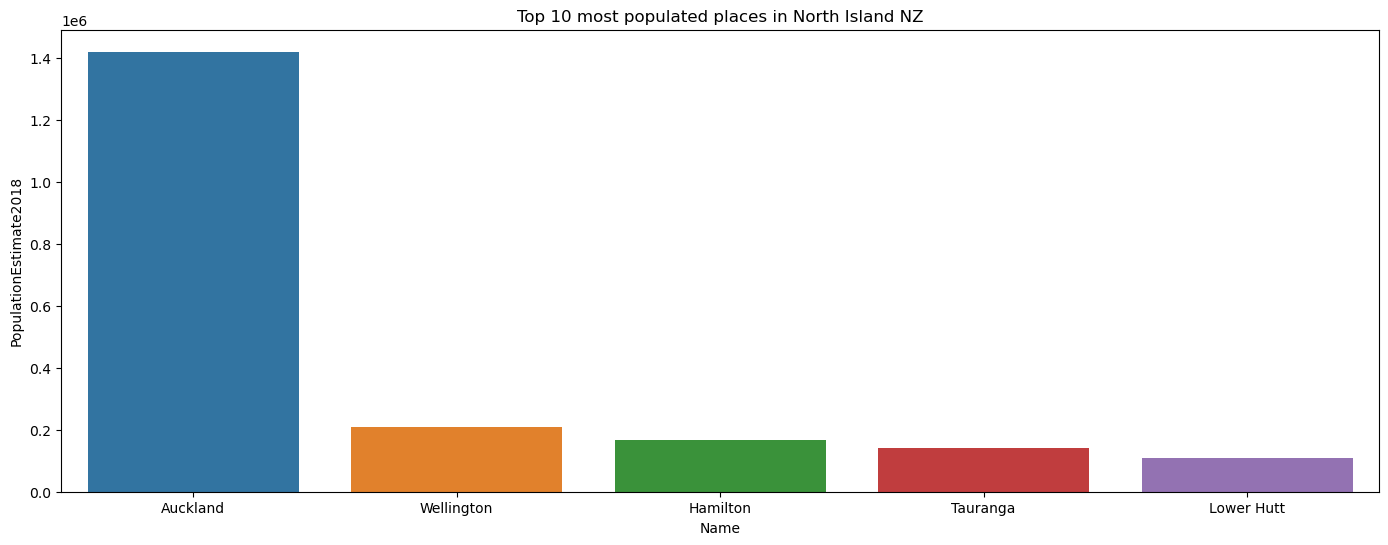

In [270]:
top_10 = north_island_data.sort_values(by='PopulationEstimate2018', ascending=False).head(10)

plt.figure(figsize=(17, 6))
sns.barplot(x='Name', y='PopulationEstimate2018', data=top_10)
plt.title("Top 10 most populated places in North Island NZ")
plt.show()

In [271]:
north_island_data.sort_values(by='PopulationEstimate2018', ascending=True).head(10)


,Name,Status,Region,PopulationEstimate2018
323,Waitangi,Rural Settlement,Northland,50
672,Waitangi,Rural Settlement,Northland,50
19,Castlepoint,Rural Settlement,Wellington,60
368,Castlepoint,Rural Settlement,Wellington,60
183,Ormondville,Rural Settlement,Manawatū-Wanganui,70
532,Ormondville,Rural Settlement,Manawatū-Wanganui,70
233,Raurimu,Rural Settlement,Manawatū-Wanganui,70
522,Ōnaero Beach,Rural Settlement,Taranaki,70
582,Raurimu,Rural Settlement,Manawatū-Wanganui,70
327,Waitōtara,Rural Settlement,Taranaki,70


<Figure size 2700x600 with 0 Axes>

<AxesSubplot:xlabel='Name', ylabel='PopulationEstimate2018'>

Text(0.5, 1.0, 'Top 10 least populated places in North Island NZ')

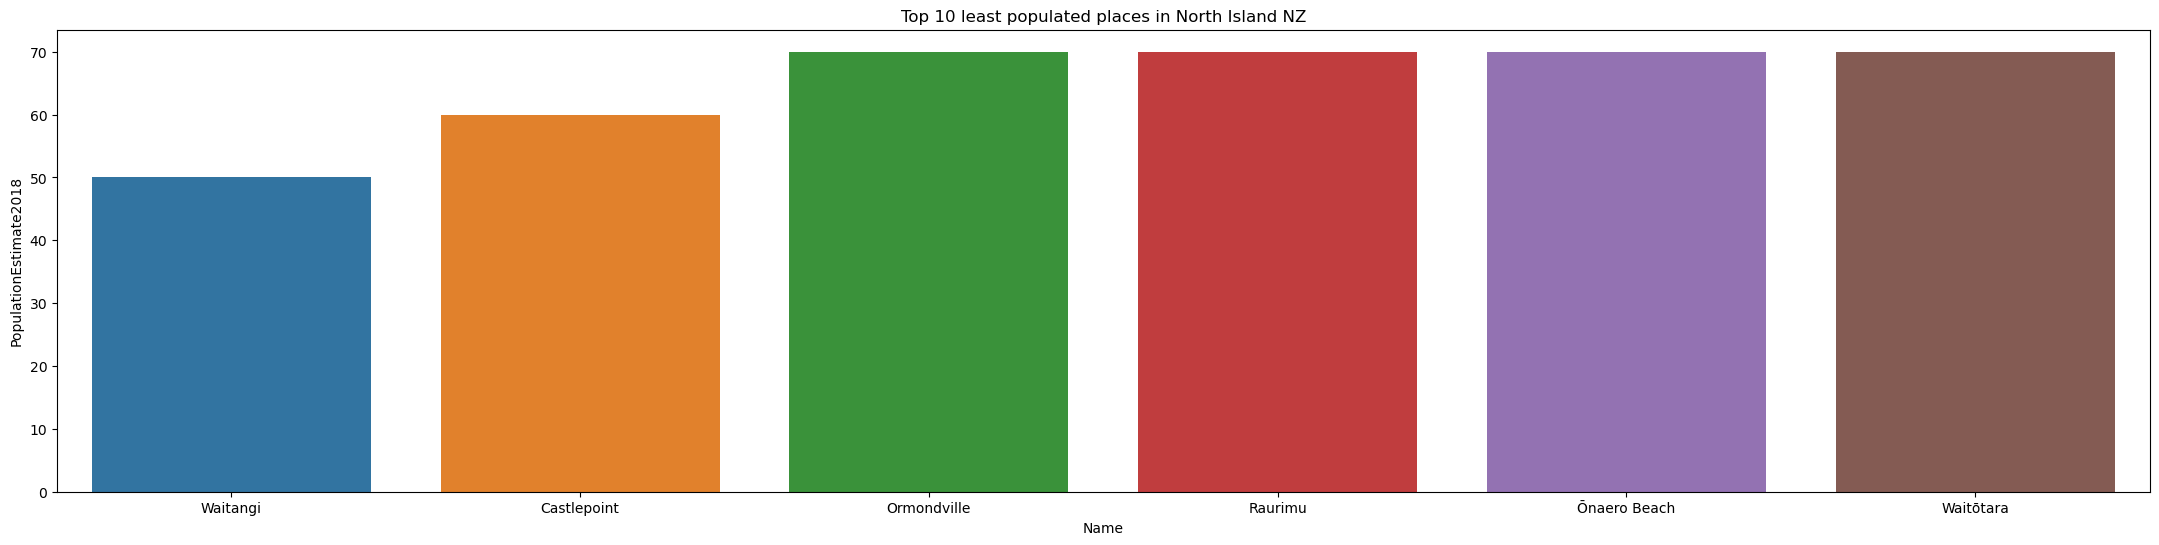

In [272]:
bottom_10 = north_island_data.sort_values(by='PopulationEstimate2018', ascending=True).head(10)

plt.figure(figsize=(27, 6))
sns.barplot(x='Name', y='PopulationEstimate2018', data=bottom_10)
plt.title("Top 10 least populated places in North Island NZ")
plt.show()

In [273]:
region_totals = north_island_data.groupby('Region')['PopulationEstimate2018'].agg(['sum', 'count'])
region_totals


,sum,count
Region,,
Auckland,3144000,118
Bay of Plenty,546640,74
Gisborne,79560,18
Hawke's Bay,291280,42
Manawatū-Wanganui,405120,100
Northland,225380,116
Taranaki,189140,44
Waikato,719220,154
Wellington,1003920,32


<Figure size 1700x600 with 0 Axes>

<AxesSubplot:xlabel='Region', ylabel='sum'>

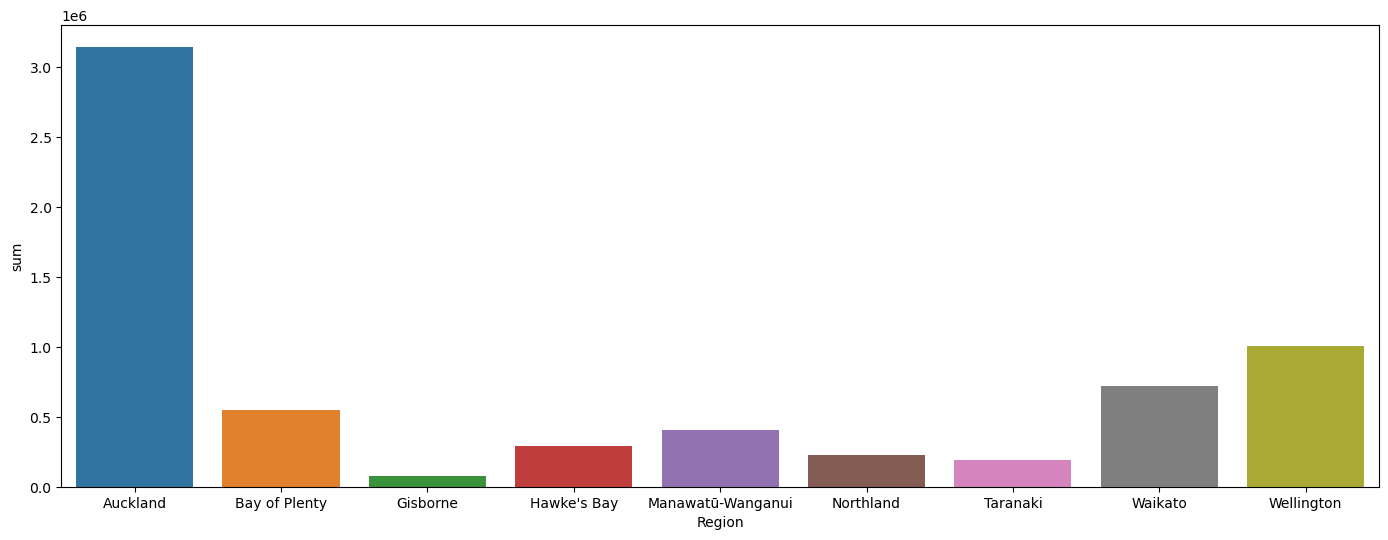

In [274]:
plt.figure(figsize=(17, 6))
sns.barplot(x=region_totals.index, y='sum', data=region_totals)
plt.show()

In [275]:
south_island_data.shape

(454, 4)

In [276]:
south_island_data.dtypes

Name                            object
Status                          object
Region                          object
PopulationEstimate2018-06-30    object
dtype: object

In [277]:
south_island_data['PopulationEstimate2018-06-30'] = south_island_data['PopulationEstimate2018-06-30'].str.replace(',', '')


In [278]:
south_island_data.head()


,Name,Status,Region,PopulationEstimate2018-06-30
0,Ahaura,Rural Settlement,West Coast,100
1,Akaroa,Rural Settlement,Canterbury,770
2,Alexandra,Small Urban Area,Otago,5630
3,Allanton,Rural Settlement,Otago,310
4,Amberley,Small Urban Area,Canterbury,2110


In [279]:
south_island_data['PopulationEstimate2018-06-30'] = pd.to_numeric(south_island_data['PopulationEstimate2018-06-30'])


In [280]:
south_island_data.dtypes


Name                            object
Status                          object
Region                          object
PopulationEstimate2018-06-30     int64
dtype: object

In [281]:
south_island_data = south_island_data.rename(columns={'PopulationEstimate2018-06-30': 'PopulationEstimate2018'})
south_island_data.head(2)

,Name,Status,Region,PopulationEstimate2018
0,Ahaura,Rural Settlement,West Coast,100
1,Akaroa,Rural Settlement,Canterbury,770


In [282]:
south_island_data.sort_values(by='PopulationEstimate2018', ascending=False).head(10)


,Name,Status,Region,PopulationEstimate2018
28,Christchurch,Major Urban Area,Canterbury,372500
255,Christchurch,Major Urban Area,Canterbury,372500
40,Dunedin,Major Urban Area,Otago,104200
267,Dunedin,Major Urban Area,Otago,104200
352,Nelson,Large Urban Area,Nelson,49800
125,Nelson,Large Urban Area,Nelson,49800
72,Invercargill,Large Urban Area,Southland,49100
299,Invercargill,Large Urban Area,Southland,49100
422,Timaru,Medium Urban Area,Canterbury,28300
195,Timaru,Medium Urban Area,Canterbury,28300


<Figure size 1700x600 with 0 Axes>

<AxesSubplot:xlabel='Name', ylabel='PopulationEstimate2018'>

Text(0.5, 1.0, 'Top 10 most populated places in South Island NZ')

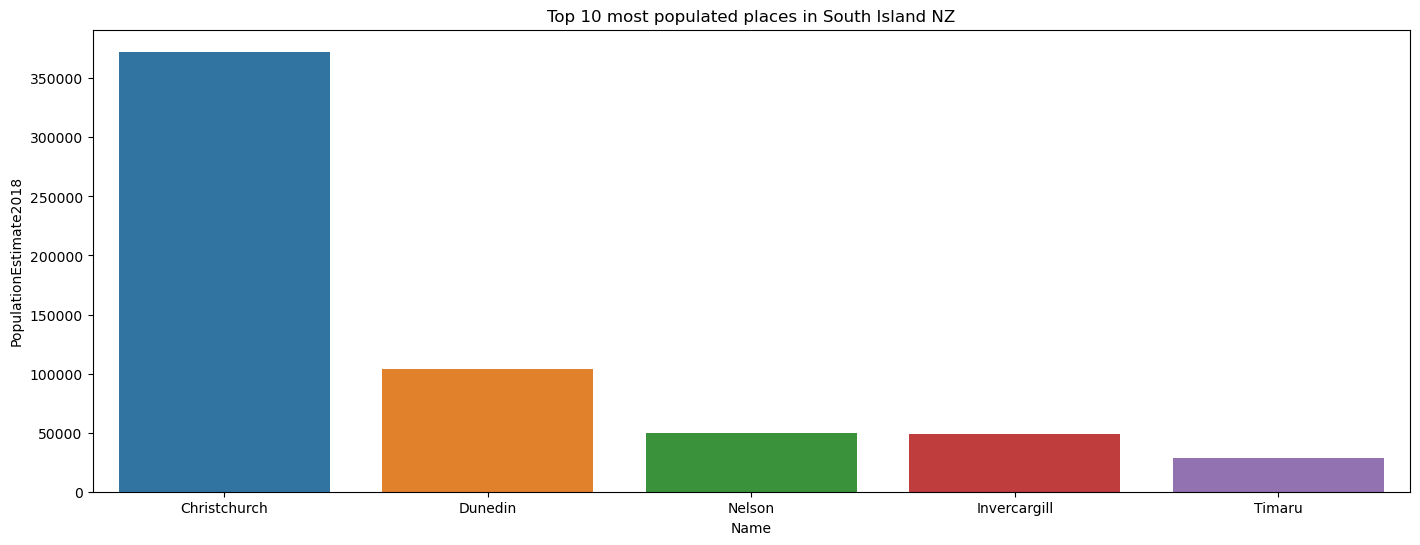

In [283]:
top_10 = south_island_data.sort_values(by='PopulationEstimate2018', ascending=False).head(10)

plt.figure(figsize=(17, 6))
sns.barplot(x='Name', y='PopulationEstimate2018', data=top_10)
plt.title("Top 10 most populated places in South Island NZ")
plt.show()

In [284]:
south_island_data.sort_values(by='PopulationEstimate2018', ascending=True).head(10)


,Name,Status,Region,PopulationEstimate2018
252,Castle Hill,Rural Settlement,Canterbury,20
25,Castle Hill,Rural Settlement,Canterbury,20
377,Pounawea,Rural Settlement,Otago,50
236,Arthur's Pass,Rural Settlement,Canterbury,50
150,Pounawea,Rural Settlement,Otago,50
9,Arthur's Pass,Rural Settlement,Canterbury,50
127,Ngākuta Bay,Rural Settlement,Marlborough,60
343,Moana,Rural Settlement,West Coast,60
354,Ngākuta Bay,Rural Settlement,Marlborough,60
116,Moana,Rural Settlement,West Coast,60


<Figure size 2700x600 with 0 Axes>

<AxesSubplot:xlabel='Name', ylabel='PopulationEstimate2018'>

Text(0.5, 1.0, 'Top 10 least populated places in South Island NZ')

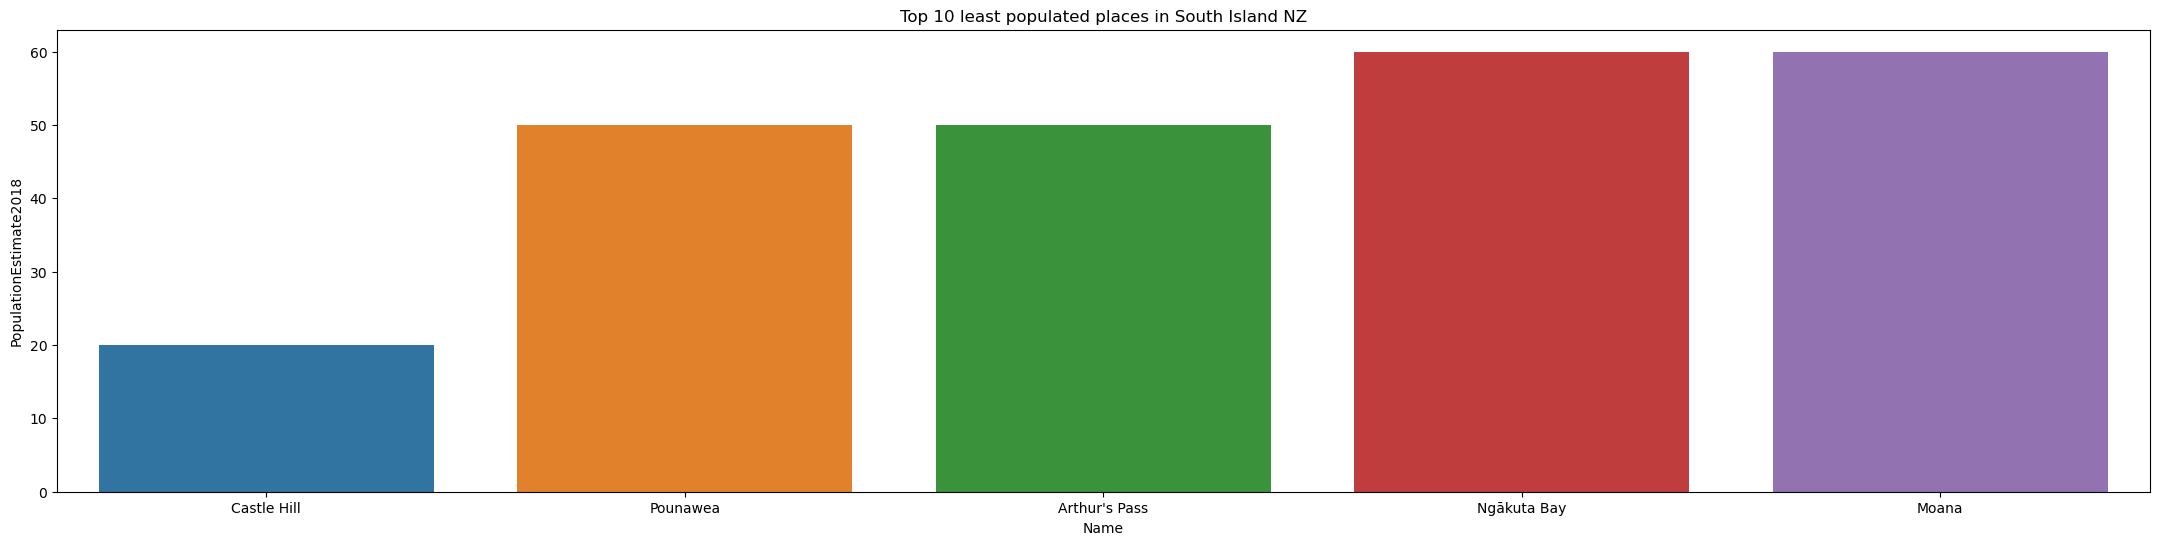

In [285]:
bottom_10 = south_island_data.sort_values(by='PopulationEstimate2018', ascending=True).head(10)

plt.figure(figsize=(27, 6))
sns.barplot(x='Name', y='PopulationEstimate2018', data=bottom_10)
plt.title("Top 10 least populated places in South Island NZ")
plt.show()

In [286]:
region_totals = south_island_data.groupby('Region')['PopulationEstimate2018'].agg(['sum', 'count'])
region_totals

,sum,count
Region,,
Canterbury,1089680,174
Marlborough,78780,34
Nelson,99600,2
Otago,409980,116
Southland,147320,46
Tasman,73740,38
West Coast,45580,44


<Figure size 1700x600 with 0 Axes>

<AxesSubplot:xlabel='Region', ylabel='sum'>

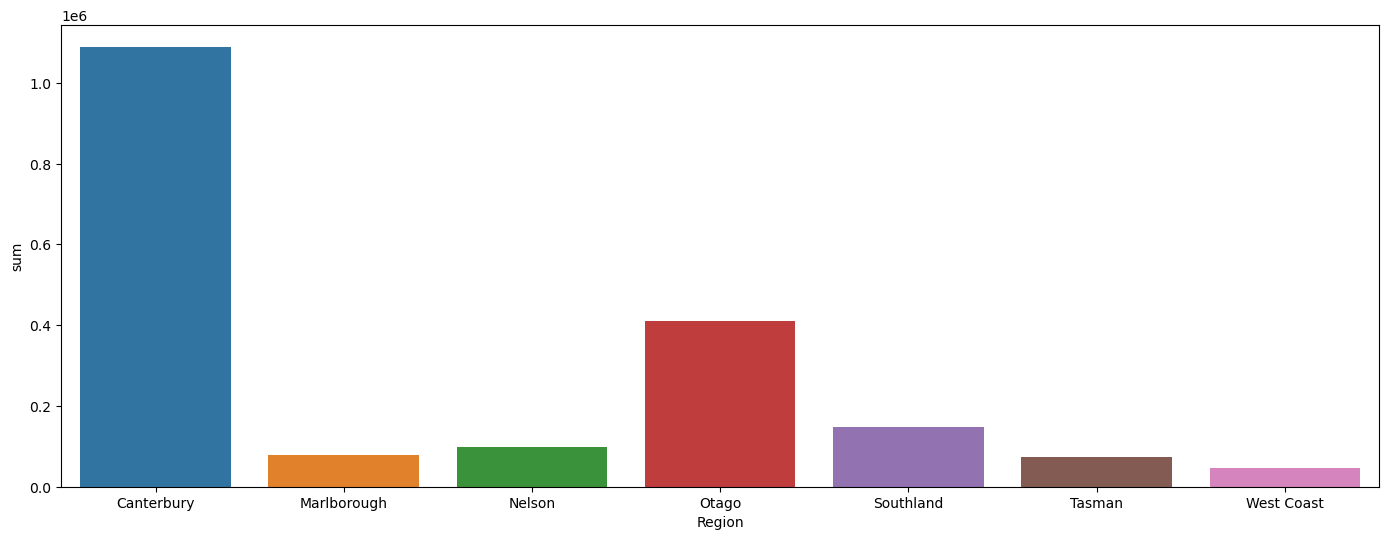

In [287]:
plt.figure(figsize=(17, 6))
sns.barplot(x=region_totals.index, y='sum', data=region_totals)
plt.show()

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='Name', ylabel='PopulationEstimate2018'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Castle Hill'),
  Text(1, 0, 'Pounawea'),
  Text(2, 0, "Arthur's Pass"),
  Text(3, 0, 'Ngākuta Bay'),
  Text(4, 0, 'Moana')])

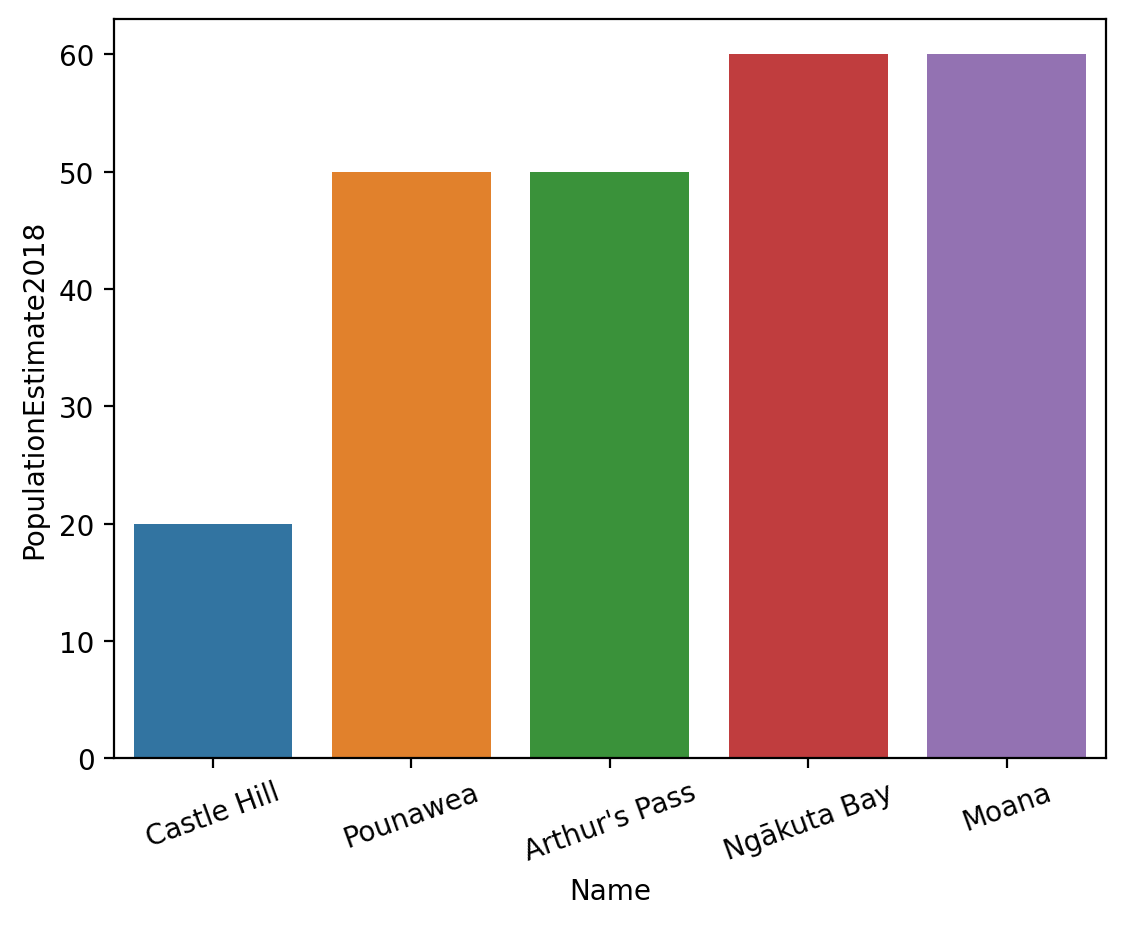

In [300]:
plt.figure(dpi = 200)
sns.barplot(x='Name', y='PopulationEstimate2018', data=bottom_10);
plt.xticks(rotation = 20)